# Question 2. 
Build a predictive linear regression model for given dataset, given humidity predict apparent temperature

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# Reading in the training data
try:
    df = pd.read_csv("weatherHistory.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Cleaning and PreProcessing

In [3]:
df.head()     # First 10 rows of the training data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
plt.scatter(df['Temperature (C)'][:1000], df['Apparent Temperature (C)'][:1000])

In [4]:
data = df[['Humidity', 'Apparent Temperature (C)']]
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
       Humidity  Apparent Temperature (C)
0          0.89                  7.388889
1          0.86                  7.227778
2          0.89                  9.377778
3          0.83                  5.944444
4          0.83                  6.977778
...         ...                       ...
96448      0.43                 26.016667
96449      0.48                 24.583333
96450      0.56                 22.038889
96451      0.60                 21.522222
96452      0.61                 20.438889

[96453 rows x 2 columns]


In [5]:
data.rename(columns={'Apparent Temperature (C)':'temp'}, inplace=True)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_19228\3076963094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Apparent Temperature (C)':'temp'}, inplace=True)


In [6]:
data.describe()     # detailed descriptive analysis of data

,Humidity,temp
count,96453.000000,96453.000000
mean,0.734899,10.855029
std,0.195473,10.696847
min,0.000000,-27.716667
25%,0.600000,2.311111
50%,0.780000,12.000000
75%,0.890000,18.838889
max,1.000000,39.344444


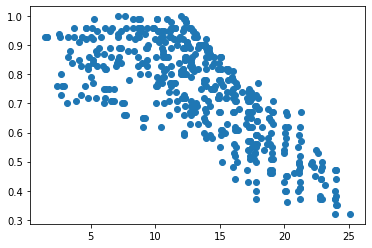

In [8]:
plt.scatter(data['temp'][:500], data['Humidity'][:500])

In [ ]:
sn.regplot(x=data["Humidity"], y=data["temp"])

In [9]:
data.describe()

,Humidity,temp
count,96453.000000,96453.000000
mean,0.734899,10.855029
std,0.195473,10.696847
min,0.000000,-27.716667
25%,0.600000,2.311111
50%,0.780000,12.000000
75%,0.890000,18.838889
max,1.000000,39.344444


In [10]:
data.isnull().any()

Humidity    False
temp        False
dtype: bool

In [11]:
data['temp'] = data['temp'].replace(0, np.NaN)
data['Humidity'] = data['Humidity'].replace(0, np.NaN)

C:\Users\zeesh\AppData\Local\Temp\ipykernel_19228\399548265.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp'] = data['temp'].replace(0, np.NaN)
C:\Users\zeesh\AppData\Local\Temp\ipykernel_19228\399548265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Humidity'] = data['Humidity'].replace(0, np.NaN)


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

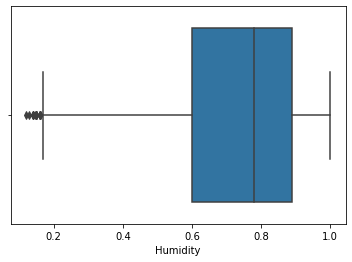

In [13]:
sn.boxplot(data['Humidity'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

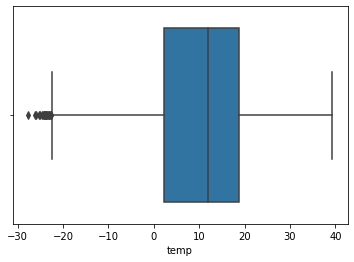

In [12]:
sn.boxplot(data['temp'])

In [14]:
# Remove the outlier from the whole dataset
def remove_outlier(data):
    quant_df = data.quantile([0.20, 0.80])
    for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.20, name]) & (data[name] < quant_df.loc[0.80, name])]
    return data

In [15]:
data = remove_outlier(data)  # removing outliers from data 

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

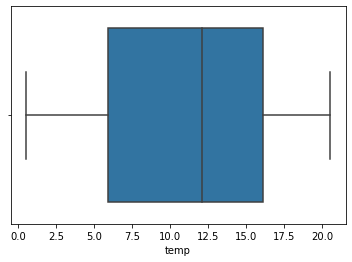

In [16]:
sn.boxplot(data['temp'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Humidity'>

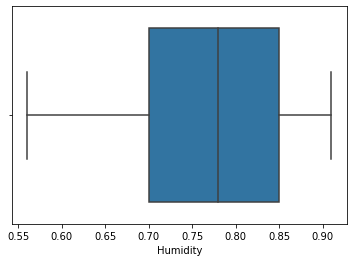

In [17]:
sn.boxplot(data['Humidity'])

In [ ]:
# Replace the nan values with median of column 'Temp'
data['temp'] = data['temp'].replace(0, np.NaN)

In [ ]:
# Replace the nan values with median of column 'Temp'
data['Humidity'] = data['Humidity'].replace(0, np.NaN)

In [18]:
# Check the null values in the dataset
data.isnull().any()

Humidity    False
temp        False
dtype: bool

In [19]:
data.describe()

,Humidity,temp
count,37842.000000,37842.000000
mean,0.769053,11.125443
std,0.096108,5.745865
min,0.560000,0.516667
25%,0.700000,5.900000
50%,0.780000,12.111111
75%,0.850000,16.094444
max,0.910000,20.550000


In [20]:
data['Humidity'] = data['Humidity'].replace(np.NaN, data['Humidity'].mean())
data['temp'] = data['temp'].replace(np.NaN, data['temp'].mean())

In [21]:
data.isnull().any()

Humidity    False
temp        False
dtype: bool

In [22]:
data.describe()

,Humidity,temp
count,37842.000000,37842.000000
mean,0.769053,11.125443
std,0.096108,5.745865
min,0.560000,0.516667
25%,0.700000,5.900000
50%,0.780000,12.111111
75%,0.850000,16.094444
max,0.910000,20.550000


In [23]:
data.duplicated().sum()

11473

### Distribution plot of the feature variable 'x' and target variable 'y'

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Humidity', ylabel='Density'>

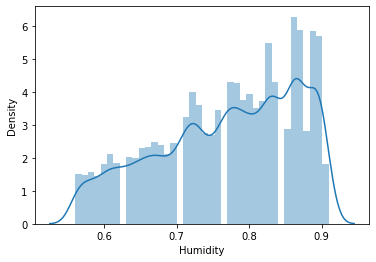

In [25]:
sn.distplot(data['Humidity'])

In [26]:
data['Humidity'].skew()

-0.4347457048348343

Skewness is -0.2577706000120726
0.6006792532107184 0.6084


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


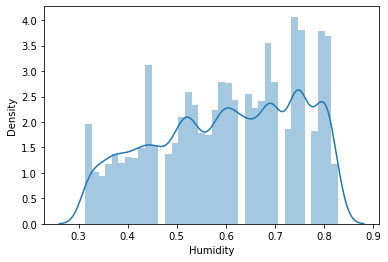

In [28]:
# now transforming feature variable
target = (np.square((data['Humidity'])))
print ('Skewness is', target.skew())
sn.distplot(target)
print(target.mean(), target.median())
data['Humidity'] = target

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

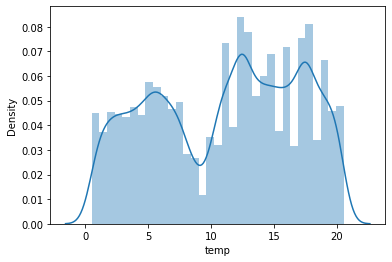

In [29]:
sn.distplot(data['temp'])

In [30]:
data['temp'].skew()

-0.18636041534903935

Skewness is 0.3982817129872656
156.78957953586746 146.67901234567893


c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


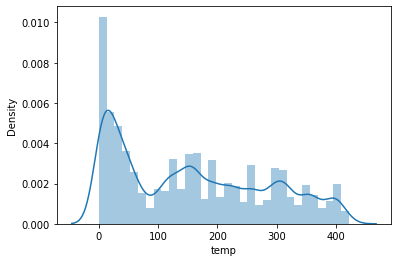

In [53]:
# now transforming feature variable
target = (np.squared((data['temp'])))
print ('Skewness is', target.skew())
sn.distplot(target)
print(target.mean(), target.median())
# data['temp'] = target

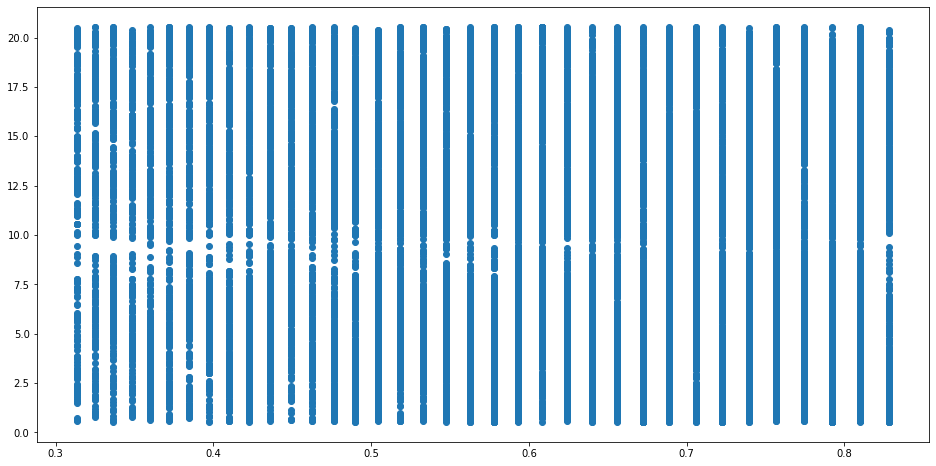

In [33]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Humidity'], data['temp'])
plt.show()


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(data['Humidity'], data['temp'], test_size = 0.3)

### Gradient Descent Algorithm

**Cost Function**

For Univariate Linear Regression, We have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$
In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [36]:
#Function to calculate the cost
def cost_computation(x_values, y_values, w, b):
    m = x_values.shape[0] 
    cost = 0
    
    for i in range(m):
        function_wb = w * x_values[i] + b
        cost = cost + (function_wb - y_values[i])**2
    total_cost = (1 / (2 * m)) * cost

    return total_cost

*Gradient Descent* is described as follows:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

In [37]:
def gradient_computation(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    for i in range(m):  
        function_wb = w * x[i] + b 
        dj_dw_i = (function_wb - y[i]) * x[i] 
        dj_db_i = function_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [38]:
import copy

def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, gradient_function):  
    w = copy.deepcopy(w_in)
    b = b_in
    w = w_in
    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w , b)     
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            
    return w, b 

In [ ]:
data.describe()   # Checking the training data before implementing the algorithm

In [ ]:
# A function to normalize the input data  ---> Here we are scaling the features for better implementation
def normalize(data):
	for i in range(data.size):
		data[i] = ((data[i] - np.mean(data))/np.std(data))

In [ ]:
x_train.values

In [ ]:
x_train.describe()

In [39]:
x_train = x_train.values
# normalize(x_train)  # Here we are scaling the features for better implementation
print(x_train)

[0.81   0.5776 0.81   ... 0.5476 0.3249 0.7056]


In [40]:
y_train = y_train.values
# normalize(y_train)  # Here we are scaling the features for better implementation

In [41]:
try:
    w_init = 0
    b_init = 0
    iteration_count = 1000
    alpha_value = 1.0e-2
    # alpha_value = 0.01
    # calling the gradient descent function
    w_final, b_final = gradient_descent(x_train,y_train, w_init, b_init, alpha_value, iteration_count, gradient_computation)
    print(f"(w,b) found by gradient descent: ({w_final},{b_final})")
except Exception as e:
    print(f"Error : {e}")

(w,b) found by gradient descent: (3.2499527617584905,9.04771778656175)


In [42]:
def y_calculated(x_value, w, b):
    return w * x_value + b  

In [43]:
x_test = x_test.values
y_expected = y_test.values
y_test = np.array([y_calculated(i, w_final, b_final) for i in x_test])

In [44]:
# function to check the accuracy of the prediction
def accuracy_check(y_predicted, y_data):
        p, e = y_predicted, y_data
        n = len(y_predicted)
        return 1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n

In [45]:
print(accuracy_check(y_expected, y_test))

0.5363545485162275


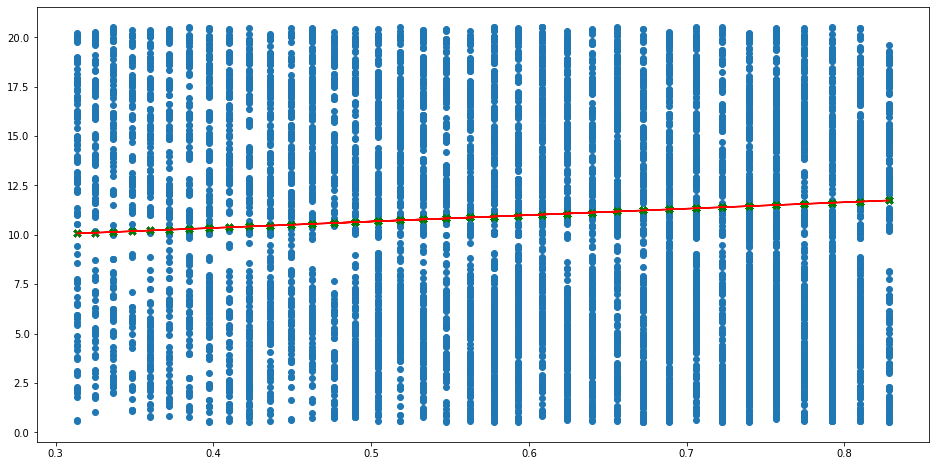

In [51]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(x_test[:500], y_test[:500], color="red")
ax.scatter(x_test, y_expected)
ax.scatter(x_test, y_test, marker="x", c="green")
plt.show()